In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

O:\anaconda3\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df = pd.read_csv('final.txt')
df = df.rename(columns={'pdockq1': 'pdockq2', 'pdockq2': 'pdockq1'})
df['pdb_id'] = df['pair'].apply(lambda x: x.split('_')[0])
selected_features = ['IntraclashesGroup1', 'IntraclashesGroup2', 'Interaction Energy',
       'Backbone Hbond', 'Sidechain Hbond', 'Van der Waals', 'Electrostatics',
       'Solvation Polar', 'Solvation Hydrophobic', 'Van der Waals clashes',
       'entropy sidechain', 'entropy mainchain', 'ptm_iptm',
       'pdockq2', 'pdockq1', 'backbone clash',
       'Interface Residues', 'pred_contact', 'Interface Residues Clashing', 'electrostatic kon',
       'Interface Residues BB Clashing', 'Interface Residues VdW Clashing']
# Make it binary by setting a threshold and split training and test
df['binary_obs_contact'] = np.where(df['obs_contact'] > 10, 1, 0)  # change here if necessary

In [9]:
# Split dataset into training and testing sets based on each structure complex
train_ids, test_ids = train_test_split(df['pdb_id'].unique(), test_size=0.2, random_state=40)
X_train = df[df.pdb_id.isin(train_ids)][selected_features] # features
X_test = df[df.pdb_id.isin(test_ids)][selected_features] # features
y_train = df[df.pdb_id.isin(train_ids)]['binary_obs_contact'] # Target variable
y_test = df[df.pdb_id.isin(test_ids)]['binary_obs_contact'] # Target variable
# scale numerical features
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [13]:
df

,IntraclashesGroup1,IntraclashesGroup2,Interaction Energy,Backbone Hbond,Sidechain Hbond,Van der Waals,Electrostatics,Solvation Polar,Solvation Hydrophobic,Van der Waals clashes,...,Interface Residues VdW Clashing,Interface Residues BB Clashing,pair,obs_contact,pred_contact,pdockq2,pdockq1,ptm_iptm,pdb_id,binary_obs_contact
0,161.1480,147.7570,45.52850,-2.912110,-1.583120,-18.9095,-1.254490,28.7354,-23.6758,48.74650,...,8,0,7LXB_A_7LXB_A,0,62,0.463,0.048,0.687,7LXB,0
1,20.2037,21.2937,-13.88220,-2.945230,-4.395080,-16.7192,-0.819818,17.1747,-22.4982,7.80684,...,4,0,1J40_B_1J40_B,0,55,0.668,0.894,0.904,1J40,0
2,38.4498,27.1958,-5.45750,-1.509110,-3.684430,-12.4962,-1.353160,15.2023,-16.6327,5.20689,...,0,0,1I85_A_1I85_C,43,42,0.578,0.816,0.907,1I85,1
3,41.7438,59.2396,20.59240,-0.944800,-0.049244,-11.8596,-2.163300,17.8063,-14.0309,22.91030,...,9,0,5LE5_C_5LE5_K,17,24,0.319,0.101,0.664,5LE5,1
4,269.5290,263.5870,-24.74730,-4.892230,-3.232880,-40.8127,-0.203678,41.6916,-59.3824,14.45860,...,0,0,3WJM_A_3WJM_A,34,143,0.714,0.547,0.874,3WJM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,512.4600,407.4030,114.44500,-4.234760,-4.948420,-44.4537,-3.952810,66.0537,-57.9259,119.23900,...,21,2,3JA8_6_3JA8_7,10,192,0.635,0.046,0.541,3JA8,0
1366,120.3540,95.9941,-15.86760,-8.884760,-7.227820,-33.6246,-7.453950,47.3403,-47.0027,14.75810,...,3,0,6MAF_A_6MAF_D,31,107,0.660,0.531,0.851,6MAF,1
1367,21.5211,17.7560,-1.23862,-2.769320,-2.834000,-13.1870,-2.742180,18.7282,-17.3493,9.92608,...,4,0,2D1P_A_2D1P_B,46,43,0.629,0.899,0.906,2D1P,1
1368,22.8690,54.7237,-7.25703,-0.781466,-1.644370,-14.0024,0.709530,15.3692,-19.6138,5.64588,...,2,0,6OL7_B_6OL7_C,65,52,0.640,0.930,0.887,6OL7,1


Best n_estimators parameter:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100}
[[ 87 135]
 [ 27 170]]
MCC score:  0.2858038844771698
              precision    recall  f1-score   support

           0       0.76      0.39      0.52       222
           1       0.56      0.86      0.68       197

    accuracy                           0.61       419
   macro avg       0.66      0.63      0.60       419
weighted avg       0.67      0.61      0.59       419



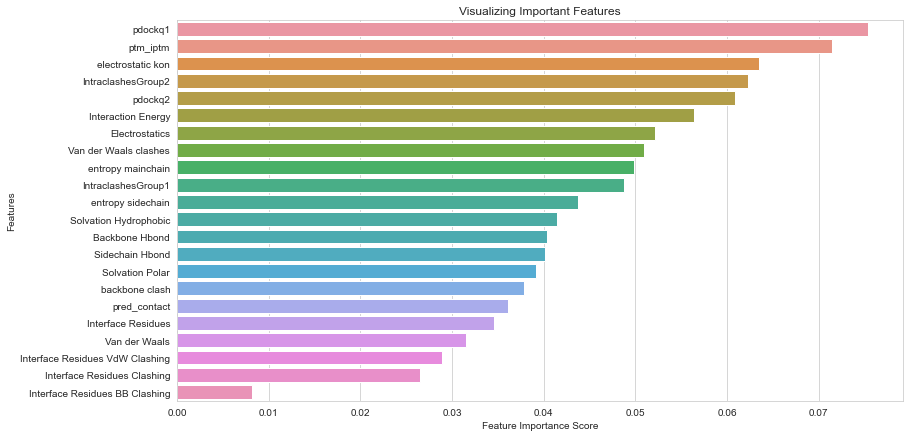

In [25]:
# Create a random forest model
rfc = RandomForestClassifier()

# Define parameter grid for grid search
#param_grid = {'n_estimators': [200],'random_state':[1,42,100]}
#param_grid = {'n_estimators': [100, 200],'max_depth': [5, 10, 20, None],'min_samples_split': [2, 5, 10],'max_features': ['auto', 'sqrt']}
param_grid = {'n_estimators': [100],'max_depth': [20],'min_samples_split': [10],'max_features': ['sqrt']}
# Perform grid search with 4 cross folds
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
# Print the best parameter and best score
#print("Best n_estimators parameter: ", best_params['n_estimators'])
print("Best n_estimators parameter: ", best_params)
#print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# fit a new model using the best hyperparameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)
# Make prediction
y_pred = rf_best.predict(X_test)
# Report the performance evaluation
#print('Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print ('MCC score: ',matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred))



feature_importances = rf_best.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
# Get names of features and their importance scores
feature_names = [selected_features[i] for i in indices]
feature_importances = feature_importances[indices]
# Plot feature importances
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()